In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Load and explore available data

In [4]:
sm = pd.read_csv('./data/socialmedia-disaster-tweets-DFE.csv', encoding='latin-1') # a simple encoding to ignore complex characters

In [6]:
sm.shape

(10876, 13)

In [5]:
sm.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


In [24]:
sm.nunique()

_unit_id                 10876
_golden                      2
_unit_state                  2
_trusted_judgments          45
_last_judgment_at          696
choose_one                   3
choose_one:confidence      463
choose_one_gold              4
keyword                    221
location                  4521
text                     10678
tweetid                   1243
userid                    9781
dtype: int64

In [57]:
sm.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
choose_one                object
choose_one:confidence    float64
choose_one_gold           object
keyword                   object
location                  object
text                      object
tweetid                  float64
userid                   float64
dtype: object

### Figure out what individual columns are
Relevant means tweet relevant to a natural disaster event. Not relevant if used jokingly or in other manners.
DATA_DICT:
1. _unit_id: int, primary key
2. _golden: bool, is_gold_standard
3. _unit_state: str, ['golden', finalized'] 
4. _trusted_judgments: int, number of people who judged relevancy of tweet
5. _last_judgment_at: datetime, timestamp for when comment was last judged
6. _choose_one: str, [Relevant', 'Not Relevant', "Can't Decide"]
7. choose_one:confidence: float, fraction that agrees on label?
8. choose_one_gold: ['Relevant', "Relevant\nCan't Decide", 'Not Relevant', "Not Relevant\nCan't Decide", nan]
9. keyword: str, word used to find tweets, can have space character %20
10. location: str, geo tag?
11. text: str, tweet text
12. tweetid: float, useless as identifier
13. userid: float, userid not unique

In [106]:
sm.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


#### Judgments

In [33]:
sm['_unit_state'].value_counts(dropna=False)
# What does finalized mean? 
# golden should mean has verified label

finalized    10789
golden          87
Name: _unit_state, dtype: int64

In [35]:
sm['_trusted_judgments'].value_counts(dropna=False).head()
# looks like number of raters? 5 raters the most unccomon, leading to 1, 0.8, 0.6 being the most common confidence
# So confidence is probably the fraction of votes

5     9833
6      698
7      217
8       41
99       8
Name: _trusted_judgments, dtype: int64

/home/douglas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


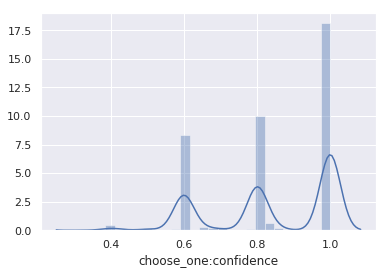

In [36]:
sns.distplot(sm['choose_one:confidence'])

In [32]:
sm['_last_judgment_at'].unique()[:5]
# looks like time when this was rated last? 

array([nan, '8/26/15 15:56', '8/28/15 19:14', '8/29/15 1:27',
       '8/26/15 16:31'], dtype=object)

In [40]:
dates = pd.to_datetime(sm['_last_judgment_at'])

In [41]:
dates.describe() # rated between one week 
# Any major events in this time period? Probably not

count                   10792
unique                    696
top       2015-08-27 16:12:00
freq                       72
first     2015-08-26 15:56:00
last      2015-09-02 23:38:00
Name: _last_judgment_at, dtype: object

#### Text

In [7]:
sm['text'].sort_values()

10517    ! Residents Return To Destroyed Homes As Washi...
2798     ! Sex-themed e-books given curfew in Germany o...
1383     # handbags Genuine Mulberry Antony Cross Body ...
8314     #360WiseNews : China's Stock Market Crash: Are...
8302     #360WiseNews : China's Stock Market Crash: Are...
8334     #360WiseNews : China's Stock Market Crash: Are...
8301     #360WiseNews : China's Stock Market Crash: Are...
8341     #360WiseNews : China's Stock Market Crash: Are...
8338     #360WiseNews : China's Stock Market Crash: Are...
8316     #360WiseNews : China's Stock Market Crash: Are...
1398     #3682 Nikon D50 6.1 MP Digital SLR Camera Body...
106      #3: Car Recorder ZeroEdgeå¨ Dual-lens Car Came...
7095     #3: TITAN WarriorCord 100 Feet - Authentic Mil...
4351     #3Novices : Renison mine sees seismic event ht...
3641     #4: The Hobbit: The Desolation of Smaug (Bilin...
1413     #7294 Nikon D50 6.1 MP Digital SLR Camera Body...
3106     #?? #?? #??? #??? MH370: Aircraft debris found.

#### Gold Standards

In [21]:
sm['_golden'].value_counts(dropna=False)

False    10792
True        84
Name: _golden, dtype: int64

In [28]:
sm['choose_one_gold'].value_counts(dropna=False) 

NaN                           10789
Relevant                         57
Not Relevant                     24
Relevant\nCan't Decide            4
Not Relevant\nCan't Decide        2
Name: choose_one_gold, dtype: int64

In [27]:
sm[sm['choose_one_gold'] == "Relevant\nCan't Decide"]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
9,778243834,True,golden,136,NaN,Relevant,0.9606,Relevant\nCan't Decide,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,21.0,NaN
13,778243838,True,golden,140,NaN,Relevant,0.9607,Relevant\nCan't Decide,NaN,NaN,I'm on top of the hill and I can see a fire in...,7.0,NaN
15,778243840,True,golden,147,NaN,Relevant,0.7177,Relevant\nCan't Decide,NaN,NaN,I'm afraid that the tornado is coming to our a...,9.0,NaN
19,778243844,True,golden,147,NaN,Relevant,0.6761,Relevant\nCan't Decide,NaN,NaN,#Flood in Bago Myanmar #We arrived Bago,24.0,NaN


In [26]:
sm[sm['choose_one_gold'] == "Not Relevant\nCan't Decide"]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
42,778243871,True,golden,147,NaN,Not Relevant,1.0000,Not Relevant\nCan't Decide,NaN,NaN,No don't tell me that!,47.0,NaN
44,778243874,True,golden,134,NaN,Not Relevant,0.5945,Not Relevant\nCan't Decide,NaN,NaN,The end!,49.0,NaN


In [30]:
len(sm[(~sm['_golden']) & (sm['choose_one_gold'] == 'Relevant')]) # check length reveals this is the discrepancy
sm[(~sm['_golden']) & (sm['choose_one_gold'] == 'Relevant')] 

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
10841,778261075,False,golden,11,8/27/15 16:33,Not Relevant,0.6324,Relevant,NaN,NaN,Sirens everywhere!,235.0,NaN
10848,778261082,False,golden,14,8/27/15 16:20,Not Relevant,0.5696,Relevant,NaN,NaN,I just heard a really loud bang and everyone i...,7807.0,NaN
10861,778261095,False,golden,3,8/27/15 13:52,Not Relevant,0.6678,Relevant,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,242635.0,NaN


In [56]:
# Fix inconsistency
sm.loc[(~sm['_golden']) & (sm['choose_one_gold'] == 'Relevant'), '_golden'] = True 

In [ ]:
# Q: How often is choose_one correct vs choose_one_gold? 

In [17]:
sm['choose_one'].value_counts()

Not Relevant    6187
Relevant        4673
Can't Decide      16
Name: choose_one, dtype: int64

In [60]:
(sm['choose_one'] == sm['choose_one_gold']).sum()

78

In [62]:
(sm.loc[sm['_golden'], 'choose_one'] == sm.loc[sm['_golden'], 'choose_one_gold']).sum() 
# Ratings from 78/87 gold standard comments are correct

78

In [71]:
# Where did they disagree?
sm.loc[sm['_golden']][(sm.loc[sm['_golden'], 'choose_one'] != sm.loc[sm['_golden'], 'choose_one_gold'])]
# Mostly the can't deicde's. 

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
9,778243834,True,golden,136,NaN,Relevant,0.9606,Relevant\nCan't Decide,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,21.0,NaN
13,778243838,True,golden,140,NaN,Relevant,0.9607,Relevant\nCan't Decide,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,7.0,NaN
15,778243840,True,golden,147,NaN,Relevant,0.7177,Relevant\nCan't Decide,NaN,NaN,I'm afraid that the tornado is coming to our area...,9.0,NaN
19,778243844,True,golden,147,NaN,Relevant,0.6761,Relevant\nCan't Decide,NaN,NaN,#Flood in Bago Myanmar #We arrived Bago,24.0,NaN
42,778243871,True,golden,147,NaN,Not Relevant,1.0000,Not Relevant\nCan't Decide,NaN,NaN,No don't tell me that!,47.0,NaN
44,778243874,True,golden,134,NaN,Not Relevant,0.5945,Not Relevant\nCan't Decide,NaN,NaN,The end!,49.0,NaN
10841,778261075,True,golden,11,8/27/15 16:33,Not Relevant,0.6324,Relevant,NaN,NaN,Sirens everywhere!,235.0,NaN
10848,778261082,True,golden,14,8/27/15 16:20,Not Relevant,0.5696,Relevant,NaN,NaN,I just heard a really loud bang and everyone is asleep great,7807.0,NaN
10861,778261095,True,golden,3,8/27/15 13:52,Not Relevant,0.6678,Relevant,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn,242635.0,NaN


#### Keyword and Location

In [43]:
sm['keyword'].value_counts().head()
# probably the key word used to find each tweet 
# For OWL - shouldn't have to worry about keywords being used jokingly
# Can use these in text generation? 

casualties        50
whirlwind         50
suicide%20bomb    50
evacuate          50
snowstorm         50
Name: keyword, dtype: int64

In [55]:
sm['location'].value_counts(dropna=False).head()

NaN              3638
USA               141
New York          109
United States      65
London             58
Name: location, dtype: int64

In [54]:
with pd.option_context('max_colwidth', -1):
    print(sm[sm['location'] == 'New York']['text'].head())
# Not sure how location is determined - tweet geo tag? 

228    See how a judge ruled in this 2009 accident at #JFK Airport? involving Korean Air?.\n\nhttp://t.co/Yh1cGlN3rl http://t.co/6F5ShPKjOB       
507    SHARK ARMY Black Date Stainless Steel Quartz Men Sport Watch - Full read by eBay http://t.co/k6OzC4wFQd http://t.co/H2ZC4nTdZN             
517    INFANTRY Mens Lume Dial Army Analog Quartz Wrist Watch Sport Blue Nylon Fabric  - Full reaÛ_ http://t.co/hEP9k0XgHb http://t.co/80EBvglmrA
528    WWI WWII JAPANESE ARMY NAVY MILITARY JAPAN LEATHER WATCH WAR MIDO WW1 2 - Full read by eBay http://t.co/F9j3l2Yjl4 http://t.co/mwwWOWCayO  
540    WWI WWII JAPANESE ARMY NAVY MILITARY JAPAN LEATHER WATCH WAR MIDO WW1 2 - Full read by eBay http://t.co/QUmcE7W2tY http://t.co/KTKG2sDhHl  
Name: text, dtype: object


#### IDs

In [94]:
sm['tweetid'].value_counts(dropna=False).head()

6.290840e+17    197
6.290830e+17    190
6.290990e+17    166
6.290800e+17    157
6.290820e+17    152
Name: tweetid, dtype: int64

In [102]:
sm[sm['tweetid'].astype('str').str.contains('6.29084')]['tweetid'][547]

6.29084e+17

In [105]:
sm[sm['tweetid'] == 6.29084e+17].head()
# Tweetid 

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
547,778245363,False,finalized,5,8/28/15 7:33,Relevant,1.0000,NaN,arson,NaN,Cheesehead Report - Arson charges filed in Jackson County house fire http://t.co/I3Y1ZWjBzO,6.290840e+17,3.115227e+09
966,778245782,False,finalized,5,9/1/15 17:59,Not Relevant,1.0000,NaN,blaze,NaN,Craving slurpees ;-;,6.290840e+17,2.423798e+09
970,778245786,False,finalized,5,9/2/15 7:32,Relevant,0.8047,NaN,blaze,"Lithgow, NSW, Australia",Lithgow News: Homeless after blaze near Portland http://t.co/Cht5w3znIK,6.290840e+17,2.763639e+08
994,778245810,False,finalized,5,8/31/15 0:13,Not Relevant,0.8006,NaN,blazing,State of Georgia,@Blazing_Ben @PattyDs50 @gwfrazee @JoshuaAssaraf Not really. Sadly I have come to expect that from Obama.,6.290840e+17,3.031839e+09
1036,778245852,False,finalized,5,8/27/15 17:05,Not Relevant,1.0000,NaN,bleeding,NaN,now my nose is bleeding. the last one was like 10 years ago,6.290840e+17,3.561959e+08


In [79]:
sm['userid'].value_counts(dropna=False).head()

NaN              87
 1.370295e+09    26
 1.651824e+09    14
 1.732410e+09    14
 2.915192e+09    11
Name: userid, dtype: int64

In [91]:
sm[sm['userid'].astype('str').str.contains('1370295')]['userid'][6799]

1370295024.0

In [93]:
sm[sm['userid'] == 1370295024].head()
# all from same user and same message

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
6799,778251616,False,finalized,5,8/30/15 5:51,Not Relevant,0.5941,NaN,loud%20bang,Kenya,kabwandi_: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.,6.288590e+17,1.370295e+09
6800,778251617,False,finalized,5,8/27/15 16:35,Not Relevant,1.0000,NaN,loud%20bang,Kenya,tkyonly1fmk: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.,6.285760e+17,1.370295e+09
6804,778251621,False,finalized,5,8/27/15 18:25,Not Relevant,0.5957,NaN,loud%20bang,Kenya,Ercjmnea: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.,6.289120e+17,1.370295e+09
6805,778251622,False,finalized,5,8/30/15 11:13,Not Relevant,0.7982,NaN,loud%20bang,Kenya,iBliz140: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.,6.290330e+17,1.370295e+09
6807,778251624,False,finalized,5,8/30/15 4:36,Not Relevant,0.5965,NaN,loud%20bang,Kenya,kotolily_: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.,6.288740e+17,1.370295e+09


# Text Processing

In [8]:
import spacy

In [12]:
nlp = spacy.load('en_core_web_sm')

In [13]:
%time spacy_docs = pd.Series(nlp.pipe(sm['text']))


CPU times: user 3min 3s, sys: 1.52 s, total: 3min 5s
Wall time: 1min 14s


In [14]:
spacy_docs.head()

0            (Just, happened, a, terrible, car, crash)
1    (Our, Deeds, are, the, Reason, of, this, #, ea...
2    (Heard, about, #, earthquake, is, different, c...
3    (there, is, a, forest, fire, at, spot, pond, ,...
4     (Forest, fire, near, La, Ronge, Sask, ., Canada)
dtype: object

In [152]:
for token in spacy_docs[46]:
    print(token.has_vector, token.is_quote, token.is_digit, token.like_url, token.like_email)

True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False False False
True False False True False


# Things to Remove
\# 
token.like_url
@...


In [110]:
spacy_docs[sm['choose_one'] == 'Relevant']

0                                                                                                                                                  (Just, happened, a, terrible, car, crash)
1                                                                                                      (Our, Deeds, are, the, Reason, of, this, #, earthquake, May, ALLAH, Forgive, us, all)
2                                                                                                           (Heard, about, #, earthquake, is, different, cities, ,, stay, safe, everyone, .)
3                                                                 (there, is, a, forest, fire, at, spot, pond, ,, geese, are, fleeing, across, the, street, ,, I, can, not, save, them, all)
4                                                                                                                                           (Forest, fire, near, La, Ronge, Sask, ., Canada)
5                         (All, residents, asked, to, '

In [145]:
# Golden stahdard tokens
spacy_docs[sm['_golden']].sample(5)

10855                                                                     (Evacuation, order, lifted, for, town, of, Roosevelt, :, http://t.co/EDyfo6E2PU, http://t.co/M5KxLPKFA1)
10851    (RT, @LivingSafely, :, #, NWS, issues, Severe, #, Thunderstorm, Warnings, for, parts, of, #, AR, #, NC, #, OK, ., Expect, more, trauma, cases, :, http://t.co/FWqfCKNCQW)
10836                (#, Ebola, #, EbolaOutbreak, Ebola, Virus, :, Birmingham, Ala., Firefighters, Quarantined, After, Possible, Exposure, Officials, Say, http://t.co/tjpYlU9fOX)
10874                                                                                                (MEG, issues, Hazardous, Weather, Outlook, (, HWO, ), http://t.co/3X6RBQJHn3)
10859                                                        (#, breaking, #, LA, Refugio, oil, spill, may, have, been, costlier, bigger, than, projected, http://t.co/5ueCmcv2Pk)
dtype: object

In [147]:
" ".join(wordninja.split(sm.loc[8, 'text']))

'Rocky Fire Update California Hwy 20 closed in both directions due to Lake County fire CA fire wildfires'

In [115]:
import wordninja # split words that are missing spaces in between 

In [126]:
owl_msg = 'Have a family of four stuck on the roof. Access by boat only. 12 year old child inmedical distress, missing insulin.'

In [136]:
%time " ".join(wordninja.split(owl_msg))

CPU times: user 1.03 ms, sys: 31 µs, total: 1.06 ms
Wall time: 1.07 ms


'Have a family of four stuck on the roof Access by boat only 12 year old child in medical distress missing insulin'

In [ ]:
## Things to consider
1. Medicine list 
2. house features?
3. Child

In [129]:
owl_doc = nlp(" ".join(wordninja.split(owl_msg)))

In [143]:
owl_doc.ents

(four, only 12 year old)

In [122]:
# displacy.serve(owl_doc, style='dep')


    Serving on port 5000...
    Using the 'dep' visualizer



127.0.0.1 - - [05/Jun/2019 23:02:25] "GET / HTTP/1.1" 200 15072
127.0.0.1 - - [05/Jun/2019 23:02:25] "GET /favicon.ico HTTP/1.1" 200 15072



    Shutting down server on port 5000.



# Most common words

In [137]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [156]:
from spacy.lang.en.stop_words import STOP_WORDS

In [140]:
# from keras.preprocessing.text import Tokenizer

In [155]:
def dummy(doc):
    "already preprocessed input"
    return doc

def to_list(doc):
    "return as list of tokens"
    return [token.text for token in doc]


In [171]:
import string

In [176]:
# haven't added max_df, min_df
tv = TfidfVectorizer(
    stop_words=STOP_WORDS.union(set(string.punctuation)),
    tokenizer=to_list,
    preprocessor=dummy,
    max_df=0.90, 
    min_df=2
)  

tv.fit(spacy_docs[sm['choose_one'] == 'Relevant'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function dummy at 0x7f177d1e9400>, smooth_idf=True,
        stop_words={'these', 'how', 'being', '=', 'onto', 'amount', '/', 'up', 'thence', '|', '(', '}', 'side', 'again', 'except', '_', 'what', 'who', 'between', 'ourselves', 'much', 'until', 'latter', 'almost', 'after', '$', 'most', 'their', 'had', 'well', 'through', 'though', 'above', 'about', 'noone', 't...\\', 'mostly', 'used', 'another', 'made', '%', 'a', 'latterly', 'somewhere', 'sometime', 'becoming'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function to_list at 0x7f177d1e9d08>, use_idf=True,
        vocabulary=None)

In [177]:
tv_bow = tv.transform(spacy_docs[sm['choose_one'] == 'Relevant'])


In [178]:
tv_bow.shape

(4673, 5327)

In [179]:
sum_words_def = tv_bow.sum(axis=0)
word_freqs_def = [(word, sum_words_def[0, idx]) for word, idx in tv.vocabulary_.items()] # map token back to its word
word_freqs_def = sorted(word_freqs_def, key=lambda x: x[1], reverse=True) # sort by most common
top_words_def = word_freqs_def[20:50]
top_words_def

[('2', 25.321168374614516),
 ('More', 24.575947838026693),
 ('crash', 24.020442458883323),
 ('disaster', 23.780005141597208),
 ('bombing', 23.717417054753607),
 ('buildings', 23.279179993864908),
 ('Northern', 22.91487124969396),
 ('\n\n', 22.57152151213476),
 ('This', 22.4807052560692),
 ('bomb', 22.38401547456711),
 ('attack', 22.16964088942754),
 ('storm', 21.49296949626163),
 ('..', 21.13810856741191),
 ('We', 21.06366448469012),
 ('Legionnaires', 20.860763253470115),
 ('bomber', 20.589469737269663),
 ('police', 20.50252112317931),
 ('burning', 20.42568924960253),
 ('PM', 20.24574707750047),
 ('RT', 20.138062572865),
 ('train', 20.06859670633849),
 ('mass', 19.930874088246632),
 ('It', 19.48646217487349),
 ('Malaysia', 19.25341803995096),
 ('Japan', 19.23753653287022),
 ('families', 19.057592017210233),
 ('Obama', 18.77170579040576),
 ('fatal', 18.723873361827305),
 ('Disaster', 17.963485731744047),
 ('Fire', 17.682623387847613)]

# Paired Terms Data

In [188]:
pt = pd.read_csv('./data/paired_terms_disaster_relef.csv')

In [197]:
pt['relevance'].describe() # a ranking from 1 to 5

count    18128.000000
mean         3.629188
std          0.763086
min          1.000000
25%          3.330000
50%          4.000000
75%          4.000000
max          5.000000
Name: relevance, dtype: float64

In [200]:
pt['_trusted_judgments'].value_counts()

3      16016
4       1764
5        249
6         23
7          9
236        7
243        7
237        6
239        5
238        5
244        4
240        4
235        4
246        3
247        3
245        3
234        3
242        3
241        2
230        2
231        1
229        1
232        1
233        1
158        1
225        1
Name: _trusted_judgments, dtype: int64

In [198]:
pt.sample(5).T

,16469,16527,2812,1201,11339
_unit_id,879656115,879656190,867854038,867852345,872551379
_golden,False,False,False,False,False
_unit_state,finalized,finalized,finalized,finalized,finalized
_trusted_judgments,3,3,3,3,3
_last_judgment_at,2/18/2016 06:58:26,2/17/2016 18:37:02,2/2/2016 14:38:53,1/29/2016 14:39:03,2/9/2016 01:19:43
is_the_term,NaN,NaN,NaN,NaN,misspelled_or_ungrammatical
is_the_term:confidence,NaN,NaN,NaN,NaN,1
relevance,2,4.33,3.67,3.67,3.67
relevance:variance,0,0.471,0.471,0.471,1.247
definition,"Any humanitarian crisis or natural disaster situation involving shelter availability, including destruction of homes, unsafe shelter conditions, etc.",Any humanitarian crisis or natural disaster situation involving intervention of US or other government or NGOs in an attempt to provide aid.,Any humanitarian crisis or natural disaster situation involving intervention of US or other government or NGOs in an attempt to provide aid.,"Any humanitarian crisis or natural disaster situation involving the need for evacuation of people from a specific ""danger zone.""",Any humanitarian crisis or natural disaster situation involving intervention of US or other government or NGOs in an attempt to provide aid.


In [191]:
pt['topic'].value_counts(dropna=False)

Medical                         1503
Energy                          1481
Elections and Politics          1480
Search and Rescue               1472
Water                           1461
Extreme Violence, Terrorism     1447
Violent Civil Unrest            1436
Food                            1421
Intervention                    1421
Evacuation                      1398
Infrastructure and Utilities    1244
Shelter                         1230
Sanitation                      1134
Name: topic, dtype: int64

In [190]:
pt['term'].value_counts(dropna=False)

BIRTHDAY PARTY              26
MUSIC LIBRARY               23
MICROSOFT EXCEL             20
HYDROPOWER FACILITIES       19
FLAVORED TOBACCO            18
SALES FORCE                 18
MULTIPLE-CHOICE TEST        18
POWER LINES                 17
FINE-TIP PEN                17
TEENAGE WASTELAND           17
BHUDDISM                    16
PUBLIC HEALTH               16
EAGLES GUITARIST            16
RIOT POLICE                 16
FIFA CORRUPTION             15
REBRANDING                  15
LUXERY TRAINS               15
POWER SUPPLY                14
CLOUD SERVICES              14
HERBAL TEA                  13
RADIOSHAQ                   13
EXCRETED INFECTIONS         13
TRENCH LATRINES             13
DOG TAGS                    13
PAPER PLATES                13
POLKA DOTS                  13
BACHELOR PARTY              13
DOG FOOD                    13
TEAR GAS                    13
HIGH-PURITY COCAINE         13
                            ..
KHARIJITES                   1
SECTARIA

In [181]:
dr = pd.read_csv('./data/disaster-relief-dfe-854578.csv', encoding='latin-1') # a simple encoding to ignore complex characters

In [183]:
dr.columns

Index(['#NAME?', '#NAME?.1', '#NAME?.2', '#NAME?.3', '#NAME?.4',
       'is+AF8-the+AF8-term', 'is+AF8-the+AF8-term:confidence', 'relevance',
       'relevance:variance', 'definition', 'dist', 'example', 'freq', 'id',
       'is+AF8-the+AF8-term+AF8-gold', 'len', 'relevance+AF8-gold', 'search',
       'seed', 'term', 'topic', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41'],
      dtype='object')